# Dream11 Fantasy Points Prediction - Initial EDA

## Overview
This notebook contains the initial exploratory data analysis for the Dream11 fantasy points prediction project.

**Dataset**: IPL Player Match Data (2008-2025)
**Goal**: Build a model to predict fantasy points with MAE < 20 and R² > 0.3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries loaded successfully!")

Libraries loaded successfully!


## 1. Load and Inspect Data

In [2]:
# Load data
df = pd.read_csv('../dream11_backend/data/player_match_base.csv')
df['match_date'] = pd.to_datetime(df['match_date'])

print(f"Dataset shape: {df.shape}")
print(f"\nDate range: {df['match_date'].min()} to {df['match_date'].max()}")
print(f"\nColumns: {df.columns.tolist()}")

df.head()

Dataset shape: (25697, 23)

Date range: 2008-05-03 00:00:00 to 2025-06-03 00:00:00

Columns: ['match_date', 'player_id', 'player_name', 'team', 'opponent', 'venue', 'season', 'fantasy_points', 'runs', 'balls_faced', 'fours', 'sixes', 'dismissed', 'duck', 'wickets', 'balls_bowled', 'legal_balls_bowled', 'runs_conceded', 'maidens', 'lbw_bowled', 'catches', 'stumpings', 'runouts']


,match_date,player_id,player_name,team,opponent,venue,season,fantasy_points,runs,balls_faced,...,duck,wickets,balls_bowled,legal_balls_bowled,runs_conceded,maidens,lbw_bowled,catches,stumpings,runouts
0,2008-05-03,508a1ea7,SE Marsh,Kings XI Punjab,Kolkata Knight Riders,"Punjab Cricket Association Stadium, Mohali",2007/08,47,40,32,...,False,0,0,0,0,0,0,0,0,0
1,2008-05-03,d18f9182,DPMD Jayawardene,Kings XI Punjab,Kolkata Knight Riders,"Punjab Cricket Association Stadium, Mohali",2007/08,12,10,6,...,False,0,0,0,0,0,0,0,0,0
2,2008-05-03,a1f1829d,K Goel,Kings XI Punjab,Kolkata Knight Riders,"Punjab Cricket Association Stadium, Mohali",2007/08,7,6,7,...,False,0,0,0,0,0,0,0,0,0
3,2008-05-03,5fa06777,IK Pathan,Kings XI Punjab,Kolkata Knight Riders,"Punjab Cricket Association Stadium, Mohali",2007/08,106,24,26,...,False,2,25,24,18,0,2,1,0,0
4,2008-05-03,98ae73b1,PP Chawla,Kings XI Punjab,Kolkata Knight Riders,"Punjab Cricket Association Stadium, Mohali",2007/08,26,21,7,...,False,0,6,6,16,0,0,0,0,0


In [3]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25697 entries, 0 to 25696
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   match_date          25697 non-null  datetime64[ns]
 1   player_id           25697 non-null  object        
 2   player_name         25697 non-null  object        
 3   team                25697 non-null  object        
 4   opponent            25697 non-null  object        
 5   venue               25697 non-null  object        
 6   season              25697 non-null  object        
 7   fantasy_points      25697 non-null  int64         
 8   runs                25697 non-null  int64         
 9   balls_faced         25697 non-null  int64         
 10  fours               25697 non-null  int64         
 11  sixes               25697 non-null  int64         
 12  dismissed           25697 non-null  bool          
 13  duck                25697 non-null  bool      

In [4]:
# Basic statistics
df.describe()

,match_date,fantasy_points,runs,balls_faced,fours,sixes,wickets,balls_bowled,legal_balls_bowled,runs_conceded,maidens,lbw_bowled,catches,stumpings,runouts
count,25697,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000
mean,2017-04-23 10:18:22.541152768,33.870997,13.590458,10.294159,1.224929,0.549442,0.485037,10.641359,10.294159,14.051329,0.010702,0.122154,0.324785,0.014476,0.055610
min,2008-05-03 00:00:00,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012-05-17 00:00:00,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017-04-24 00:00:00,27.000000,4.000000,5.000000,0.000000,0.000000,0.000000,6.000000,6.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2022-04-11 00:00:00,52.000000,20.000000,16.000000,2.000000,1.000000,1.000000,24.000000,24.000000,27.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,2025-06-03 00:00:00,286.000000,175.000000,73.000000,19.000000,17.000000,6.000000,34.000000,33.000000,76.000000,2.000000,5.000000,5.000000,3.000000,3.000000
std,NaN,31.802798,19.989453,13.157768,2.080063,1.203646,0.860899,11.068617,10.691832,15.507479,0.103273,0.385342,0.595207,0.135332,0.244931


## 2. Fantasy Points Distribution

In [5]:
# Fantasy points statistics
print("Fantasy Points Statistics:")
print(f"Mean: {df['fantasy_points'].mean():.2f}")
print(f"Median: {df['fantasy_points'].median():.2f}")
print(f"Std Dev: {df['fantasy_points'].std():.2f}")
print(f"Min: {df['fantasy_points'].min():.2f}")
print(f"Max: {df['fantasy_points'].max():.2f}")
print(f"\nCoefficient of Variation: {df['fantasy_points'].std() / df['fantasy_points'].mean():.2f}")
print("(High CV indicates high variance relative to mean)")

Fantasy Points Statistics:
Mean: 33.87
Median: 27.00
Std Dev: 31.80
Min: -4.00
Max: 286.00

Coefficient of Variation: 0.94
(High CV indicates high variance relative to mean)


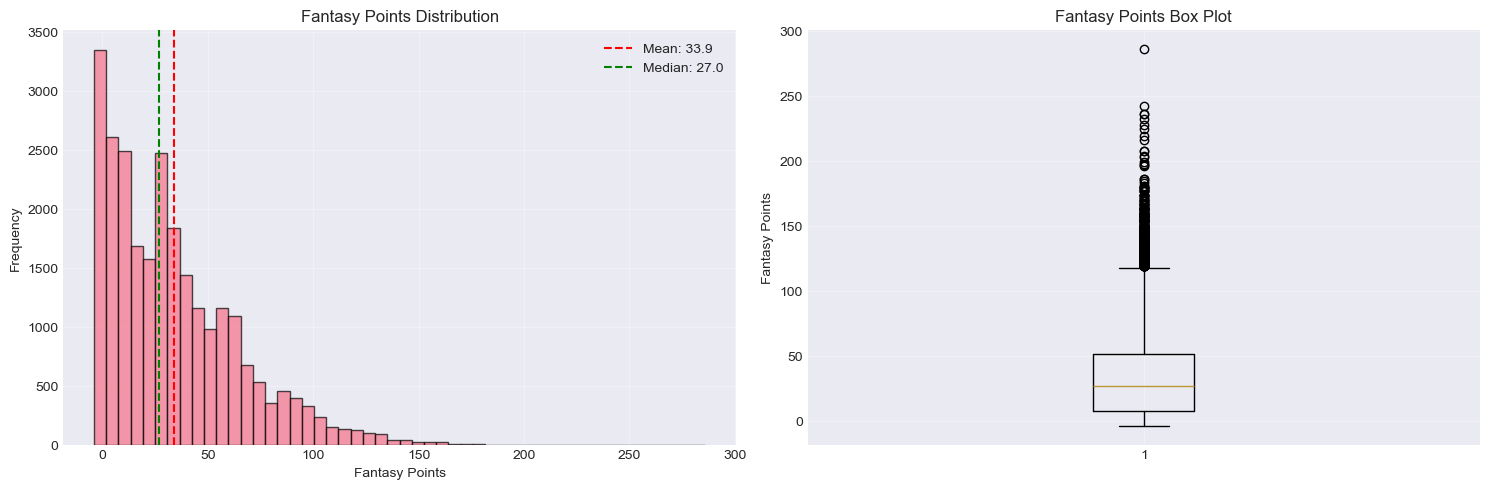


✓ Visualization saved: fantasy_points_distribution.png


In [6]:
# Distribution plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['fantasy_points'], bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(df['fantasy_points'].mean(), color='red', linestyle='--', label=f'Mean: {df["fantasy_points"].mean():.1f}')
axes[0].axvline(df['fantasy_points'].median(), color='green', linestyle='--', label=f'Median: {df["fantasy_points"].median():.1f}')
axes[0].set_xlabel('Fantasy Points')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Fantasy Points Distribution')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df['fantasy_points'], vert=True)
axes[1].set_ylabel('Fantasy Points')
axes[1].set_title('Fantasy Points Box Plot')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('fantasy_points_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved: fantasy_points_distribution.png")

## 3. Temporal Analysis

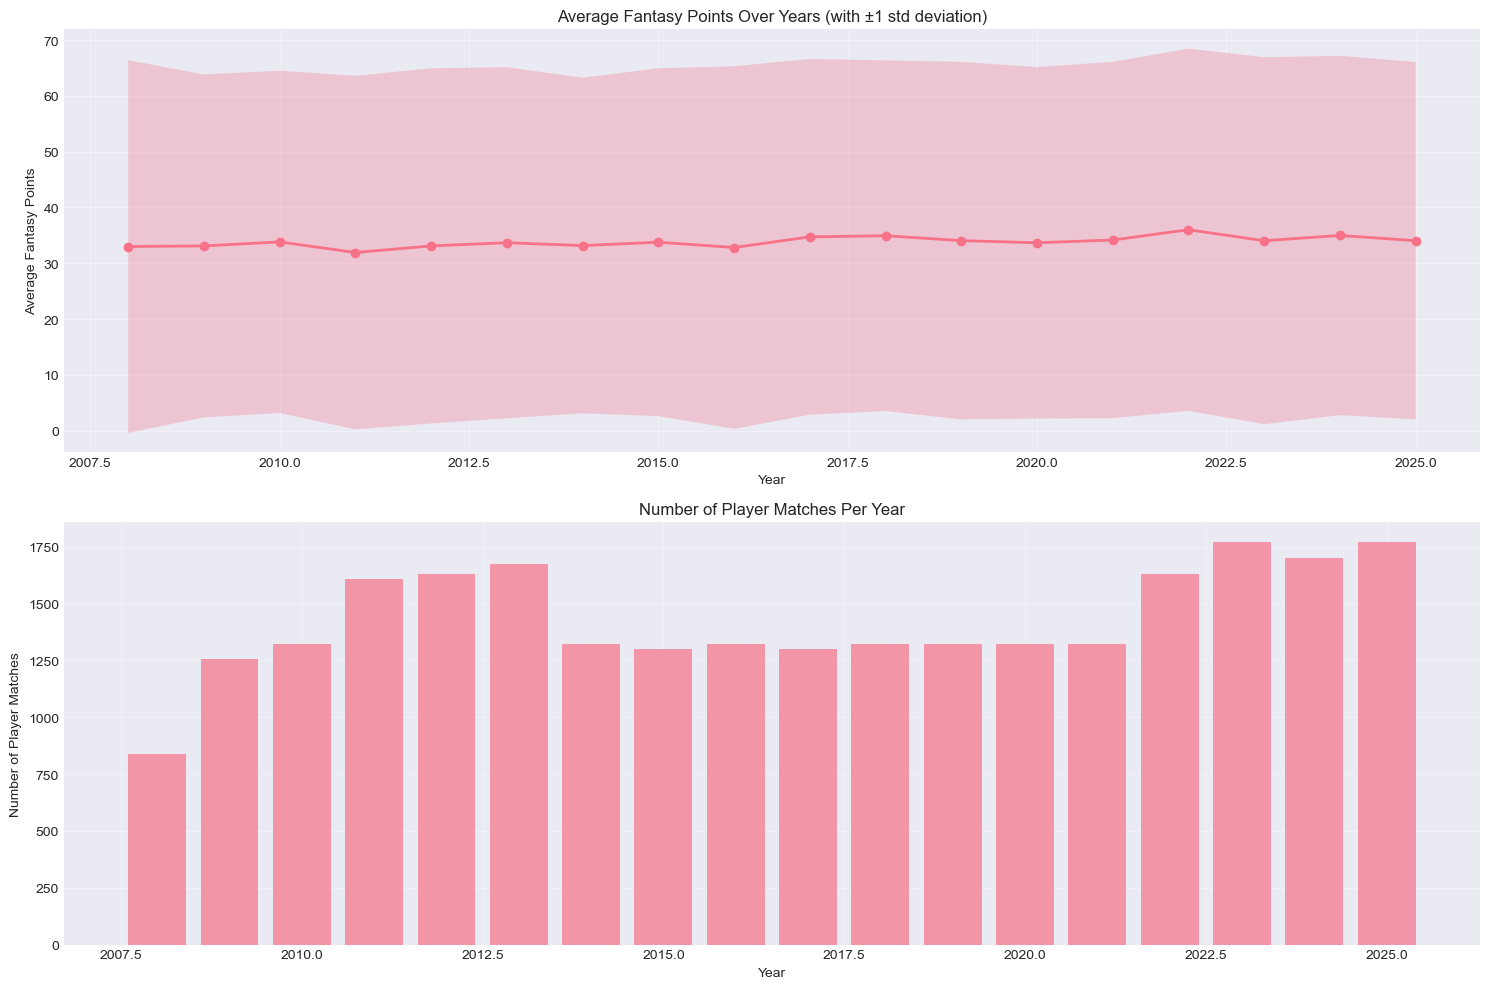


✓ Visualization saved: temporal_analysis.png


In [7]:
# Fantasy points over years
yearly_stats = df.groupby(df['match_date'].dt.year)['fantasy_points'].agg(['mean', 'std', 'count'])

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Average fantasy points per year
axes[0].plot(yearly_stats.index, yearly_stats['mean'], marker='o', linewidth=2)
axes[0].fill_between(yearly_stats.index, 
                      yearly_stats['mean'] - yearly_stats['std'],
                      yearly_stats['mean'] + yearly_stats['std'],
                      alpha=0.3)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Average Fantasy Points')
axes[0].set_title('Average Fantasy Points Over Years (with ±1 std deviation)')
axes[0].grid(True, alpha=0.3)

# Number of matches per year
axes[1].bar(yearly_stats.index, yearly_stats['count'], alpha=0.7)
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Player Matches')
axes[1].set_title('Number of Player Matches Per Year')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('temporal_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved: temporal_analysis.png")

## 4. Feature Correlations

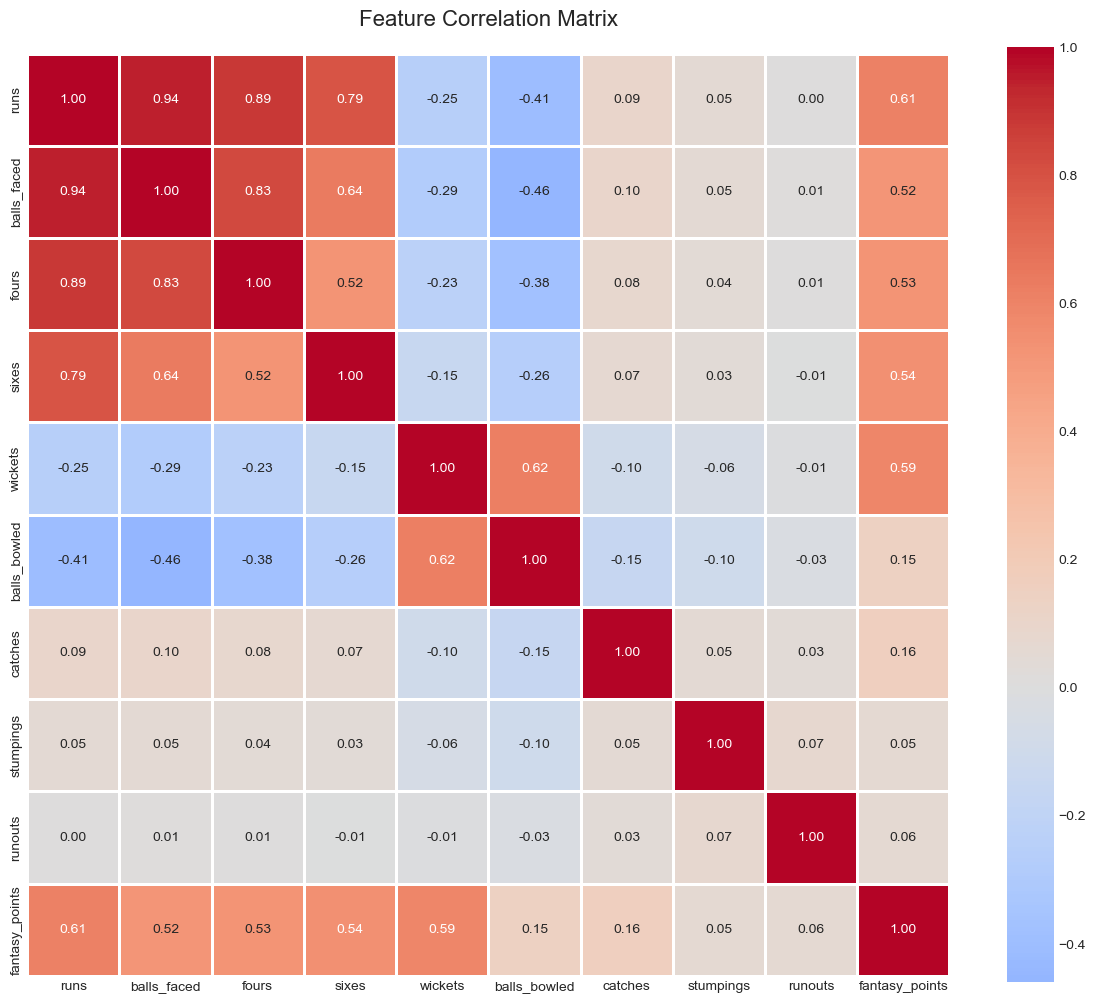


✓ Visualization saved: correlation_matrix.png

Correlations with Fantasy Points:
fantasy_points    1.000000
runs              0.606679
wickets           0.586964
sixes             0.540824
fours             0.530949
balls_faced       0.518014
catches           0.156747
balls_bowled      0.146499
runouts           0.063486
stumpings         0.053846
Name: fantasy_points, dtype: float64


In [12]:
# Select numerical features
numerical_features = ['runs', 'balls_faced', 'fours', 'sixes', 'wickets', 
                     'balls_bowled', 'catches', 'stumpings', 'runouts', 'fantasy_points']

# Correlation matrix
corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1)
plt.title('Feature Correlation Matrix', fontsize=16, pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved: correlation_matrix.png")

# Top correlations with fantasy points
print("\nCorrelations with Fantasy Points:")
fp_corr = corr_matrix['fantasy_points'].sort_values(ascending=False)
print(fp_corr)

## 5. Role-Based Analysis

Fantasy Points by Role:
           mean  median        std  count
role                                     
AR    42.448827    34.0  36.997592    938
BOWL  34.757961    29.0  32.688848  11965
WK    34.147001    28.0  28.883648   2034
BAT   32.084758    23.0  30.659587  10760


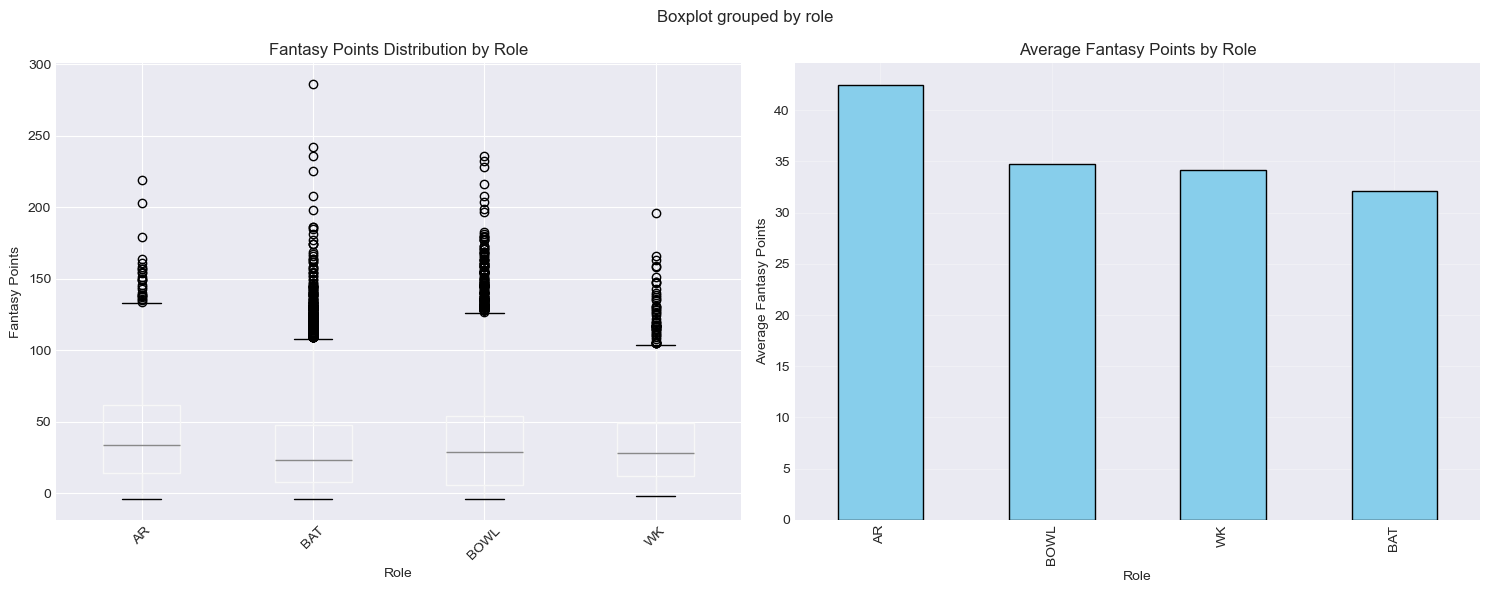


✓ Visualization saved: role_based_analysis.png


In [13]:
# Load roles
roles_global = pd.read_csv('../dream11_backend/data/player_roles_global.csv')
df_with_roles = df.merge(roles_global[['player_id', 'role']], on='player_id', how='left')
df_with_roles['role'] = df_with_roles['role'].fillna('Unknown')

# Fantasy points by role
role_stats = df_with_roles.groupby('role')['fantasy_points'].agg(['mean', 'median', 'std', 'count'])
role_stats = role_stats.sort_values('mean', ascending=False)

print("Fantasy Points by Role:")
print(role_stats)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box plot
df_with_roles.boxplot(column='fantasy_points', by='role', ax=axes[0])
axes[0].set_xlabel('Role')
axes[0].set_ylabel('Fantasy Points')
axes[0].set_title('Fantasy Points Distribution by Role')
plt.sca(axes[0])
plt.xticks(rotation=45)

# Bar plot of averages
role_stats['mean'].plot(kind='bar', ax=axes[1], color='skyblue', edgecolor='black')
axes[1].set_xlabel('Role')
axes[1].set_ylabel('Average Fantasy Points')
axes[1].set_title('Average Fantasy Points by Role')
axes[1].grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('role_based_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved: role_based_analysis.png")

## 6. Key Insights

### Summary Statistics
- **High Variance**: Fantasy points have std ≈ mean, indicating high unpredictability
- **Skewed Distribution**: More low-scoring performances than high-scoring ones
- **Temporal Stability**: Average fantasy points relatively stable across years

### Correlations
- **Strongest predictors**: Runs, Wickets, Sixes
- **Role matters**: Different roles have different average fantasy points

### Challenge
The high coefficient of variation (CV ≈ 1) suggests that cricket performance is inherently unpredictable, making the target metrics (MAE < 20, R² > 0.3) challenging but reasonable.

In [14]:
print("\n" + "="*60)
print("INITIAL EDA COMPLETE")
print("="*60)
print("\nNext Steps:")
print("1. Feature engineering (rolling averages, recent form)")
print("2. Time-aware validation setup")
print("3. Baseline model training")
print("4. Model improvement iterations")


INITIAL EDA COMPLETE

Next Steps:
1. Feature engineering (rolling averages, recent form)
2. Time-aware validation setup
3. Baseline model training
4. Model improvement iterations
